In [1]:
import sys     ###motion_test_header
sys.path.append('../scripts/')
from robot import *

<IPython.core.display.Javascript object>


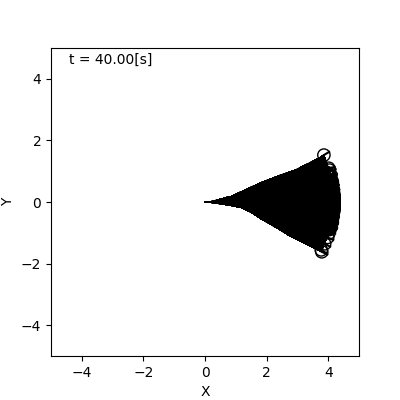

In [2]:
import copy    ###motion_test_linear

world = World(40.0, 0.1)  

initial_pose = np.array([0, 0, 0]).T
robots = []
r = Robot(initial_pose, sensor=None, agent=Agent(0.1, 0.0)) 

for i in range(100):
    copy_r = copy.copy(r)
    copy_r.distance_until_noise = copy_r.noise_pdf.rvs() #最初に雑音が発生するタイミングを変える
    world.append(copy_r)     #worldに登録することでアニメーションの際に動く
    robots.append(copy_r)   #オブジェクトの参照のリストにロボットのオブジェクトを登録

world.draw()

In [3]:
import pandas as pd ###motion_test_stats
poses = pd.DataFrame([ [math.sqrt(r.pose[0]**2 + r.pose[1]**2), r.pose[2]] for r in robots], 
                     columns=['r', 'theta'])
poses.transpose() #縦横を入れ替えて表示

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
r,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
theta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(poses["theta"].var()) ###motion_test_sigma_omeganu
print(poses["r"].mean())
math.sqrt(poses["theta"].var()/poses["r"].mean())

0.0
0.0


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


nan